In [10]:
%matplotlib inline
import numpy as np
import pyEXP
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [28]:
LMC_orbit = np.loadtxt('../../data/orbits/LMC3_orbit_satellite.txt')
MW_orbit = np.loadtxt('../../data/orbits/LMC3_orbit_host.txt')

In [38]:
LMC_orbit_gal = norm(LMC_orbit[:,0:3]-MW_orbit[:,0:3], axis=1)

f = np.savetxt('LMC_orbit_ssa.dat', np.array([np.arange(0, 80), LMC_orbit_gal]).T)

In [39]:
coefs = pyEXP.coefs.Coefs.factory('LMC_orbit_ssa.dat')

---- Coefs::factory: error opening as HDF5, trying EXP native and ascii table
---- Coefs::factory: read ascii and created TableData


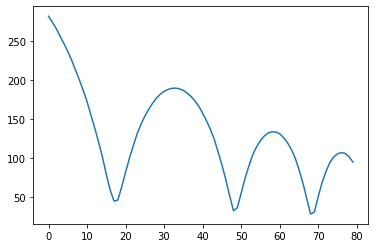

In [33]:
plt.plot(LMC_orbit_gal)

In [45]:
config = {"orbit": (coefs, [[0]], [])}

In [46]:
window = 40
npc = 10

In [47]:
# Initialize the MSSA and compute the eigenvalues
ssa = pyEXP.mssa.expMSSA(config, window, npc)
ev = ssa.eigenvalues()

shape U = 40 x 10


Text(0, 0.5, 'eigenvalue')

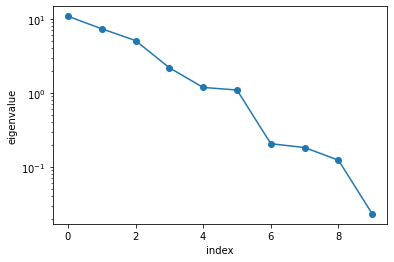

In [48]:
plt.semilogy(ev, '-o')
plt.xlabel('index')
plt.ylabel('eigenvalue')

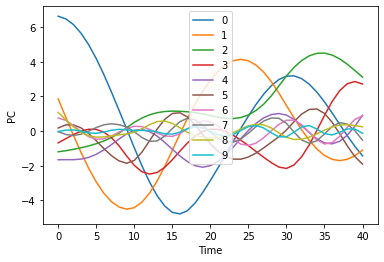

In [52]:
pc = ssa.getPC()
nt = pc.shape[0]
for i in range(10):
    plt.plot(coefs.Times()[:nt], pc[:,i], label=str(i))
plt.xlabel('Time')
plt.ylabel('PC')
plt.legend()
plt.show()



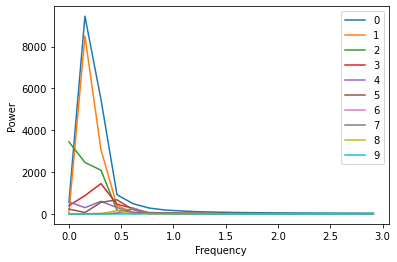

In [51]:
freq, power = ssa.pcDFT()
for i in range(power.shape[1]):
    plt.plot(freq[0:20], power[0:20,i], label=str(i))
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.show()

